In [184]:
using Pkg
using QuadGK
using Polynomials
using Plots

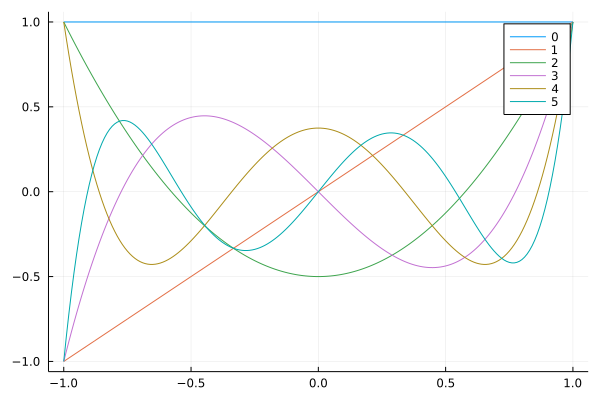

In [185]:
#zadanie 1a
function Legrendre(p)
    if p == 0
        return Polynomial([1])
    elseif p == 1
        return Polynomial([0,1])
    end

    t = zeros(Float64, p+1, p+1)
    t[1,1] = 1 #P0
    t[2,2] = 1 #P1
    for i in 3:p+1
        for j in 1:p
            k = i - 2
            t[i,j+1] = t[i,j+1] + (2*k+1) * t[i-1,j]/ (k+1)
            t[i,j] = t[i,j] - k * t[i-2, j] / (k+1)
        end
    end
    return Polynomial([coef for coef in t[p+1,:]])
end

xs = -1:0.01:1
plot(xs, [Legrendre(0)(x) for x in xs], label = "0")
plot!(xs, [Legrendre(1)(x) for x in xs], label = "1")
plot!(xs, [Legrendre(2)(x) for x in xs], label = "2")
plot!(xs, [Legrendre(3)(x) for x in xs], label = "3")
plot!(xs, [Legrendre(4)(x) for x in xs], label = "4")
plot!(xs, [Legrendre(5)(x) for x in xs], label = "5")

In [186]:
#zadanie 1b
#2:
(xp, a) = gauss(Float64, 2)
println(xp)
println(sort(roots(Legrendre(2))))
println(" ")
#3:
(xp, a) = gauss(Float64, 3)
println(xp)
println(sort(roots(Legrendre(3))))
println(" ")
#4:
(xp, a) = gauss(Float64, 4)
println(xp)
println(sort(roots(Legrendre(4))))
println(" ")

[-0.5773502691896258, 0.5773502691896258]
[-0.5773502691896258, 0.5773502691896256]
 
[-0.7745966692414834, 0.0, 0.7745966692414834]
[-0.7745966692414834, 0.0, 0.7745966692414835]
 
[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
 


In [187]:
#zadanie 1c
#Odcięte xi n-punktowej kwadratury Gaussa z funkcją ważącą w(x) w [a,b]
#są zerami wielomianu ortogonalnego φn(x) dla tego samego przedziału i tej samej funkcji ważącej.

In [188]:
#zadanie 2
function f(k, f)
    (xp, a) = gauss(Float64, k)
    return sum(a .* f.(xp))
end

for d in 2:2:22
    a = f(5, x->100*x^d)
    b = 200/(d+1)
    println(string(d))
    println(a)
    println(b)
    println(abs(a - b))
    println(" ")
end

#Kwadratura ma stopień dokładności 2n−1 (dla n-punktowej kwadratury)
#widać to tutaj przy wielomianie stopnia 10

2
66.66666666666667
66.66666666666667
0.0
 
4
40.00000000000001
40.0
7.105427357601002e-15
 
6
28.571428571428577
28.571428571428573
3.552713678800501e-15
 
8
22.222222222222225
22.22222222222222
3.552713678800501e-15
 
10
17.888636936255985
18.181818181818183
0.2931812455621987
 
12
14.585257971501356
15.384615384615385
0.7993574131140289
 
14
11.946642920019924
13.333333333333334
1.38669041331341
 
16
9.801367219505943
11.764705882352942
1.9633386628469989
 
18
8.045969231192334
10.526315789473685
2.480346558281351
 
20
6.606306950648798
9.523809523809524
2.917502573160726
 
22
5.4246340964687425
8.695652173913043
3.2710180774443005
 


In [189]:
#zadanie 3
function fab(f, a, b, k)
    (xp, w) = gauss(Float64, k)
    xp = xp .* (b-a)/2
    xp = xp .+ (b+a)/2
    return (b-a) * sum(w .* f.(xp)) / 2
end

println(fab(x->x, 0, 1, 10))
println(0.5)
println(" ")

println(fab(x->sin(x), 0, 2*pi, 10))
println(0)
println(" ")


0.5
0.5
 
3.297125689523785e-16
0
 


In [190]:
#zadanie 4a
poly = Polynomial([coef for coef in 1:5])
println(poly)
println(quadgk(poly, 0, 10)[1])

1 + 2*x + 3*x^2 + 4*x^3 + 5*x^4
111110.0


In [191]:
#zadanie 4b
func = x -> exp(-(x*x/2))/sqrt(2*pi)
println(quadgk(func, -Inf, Inf)[1])

1.0000000000032583


In [192]:
#zadanie 5
function rectangle(f, a, b, p)
    s = 0
    h = (b - a) / p
    for i in 1:p
        s = s + f(a + h * (2*i-1)/2)
    end
    return h * s
end

function trapezoid(f, a, b, p)
    s = (f(a) + f(b)) / 2
    h = (b - a) / p
    for i in 1:p-1
        s = s + f(a + i*h)
    end

    return h * s
end

function simpson(f, a, b, p)
    if p%2 == 1
        p = p - 1
    end
    s = 0
    h = (b - a) / p
    xs = [a + i*h for i in 0:p]
    ys = [f(x) for x in xs]
    for i in 1:Int(p/2)
        index = i + 1
        s = s + ys[2*i - 1] + 4 * ys[2*i] + ys[2*i + 1]
    end
    return h * s / 3
end
print("")

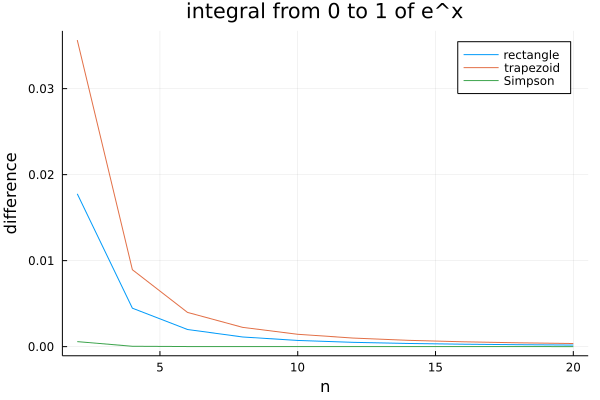

In [193]:
#zadanie 5a
func = x -> exp(x)
result = exp(1) - 1

diffs1 = []
diffs2 = []
diffs3 = []
xs = 2:2:20
for n in xs
    diffs1 = push!(diffs1, abs(result - rectangle(func, 0, 1, n)))
    diffs2 = push!(diffs2, abs(result - trapezoid(func, 0, 1, n)))
    diffs3 = push!(diffs3, abs(result - simpson(func, 0, 1, n)))
end

plot(xs, diffs1, label = "rectangle", xlab = "n", ylab = "difference", title = "integral from 0 to 1 of e^x")
plot!(xs, diffs2, label = "trapezoid", xlab = "n", ylab = "difference", title = "integral from 0 to 1 of e^x")
plot!(xs, diffs3, label = "Simpson", xlab = "n", ylab = "difference", title = "integral from 0 to 1 of e^x")

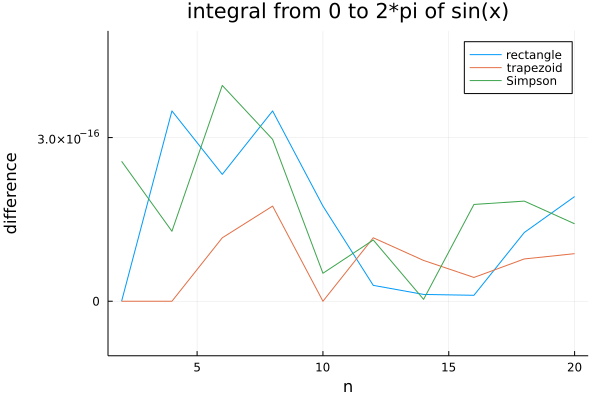

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Szymon\.julia\packages\PlotUtils\rTTui\src\ticks.jl:333
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Szymon\.julia\packages\PlotUtils\rTTui\src\ticks.jl:333


In [194]:

#zadanie 5b
func = x -> sin(x)
result = 0

diffs1 = []
diffs2 = []
diffs3 = []
xs = 2:2:20
for n in xs
    diffs1 = push!(diffs1, abs(result - rectangle(func, 0, 2*pi, n)))
    diffs2 = push!(diffs2, abs(result - trapezoid(func, 0, 2*pi, n)))
    diffs3 = push!(diffs3, abs(result - simpson(func, 0, 2*pi, n)))
end

plot(xs, diffs1, label = "rectangle", xlab = "n", ylab = "difference", title = "integral from 0 to 2*pi of sin(x)")
plot!(xs, diffs2, label = "trapezoid", xlab = "n", ylab = "difference", title = "integral from 0 to 2*pi of sin(x)")
plot!(xs, diffs3, label = "Simpson", xlab = "n", ylab = "difference", title = "integral from 0 to 2*pi of sin(x)")